In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs


In [34]:
data, label = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=500)

In [35]:
data.shape, label.shape

((1000, 2), (1000,))

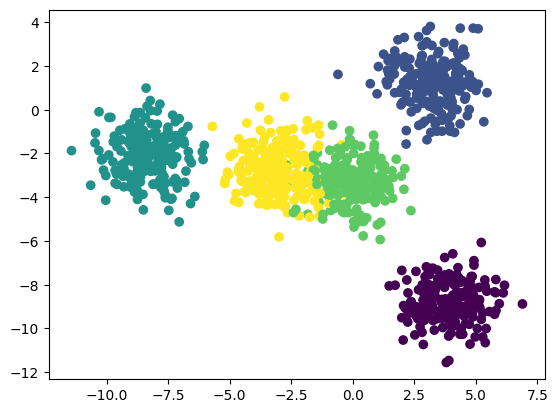

In [36]:
plt.scatter(data[:,0], data[:,1], c=label)

In [40]:
k = 7
color = ['Red','Blue','Green','Orange','Pink','Yellow','Magenta']

In [41]:
clusters = {}

for i in range(k):
    center = np.random.randint(-10, 10, 2)
    points = []
    cluster = {
        'center' : center, 
        'points' : points,
        'color' : color[i]
    }
    clusters[i] = cluster

In [42]:
clusters

{0: {'center': array([3, 2]), 'points': [], 'color': 'Red'},
 1: {'center': array([-7,  9]), 'points': [], 'color': 'Blue'},
 2: {'center': array([2, 2]), 'points': [], 'color': 'Green'},
 3: {'center': array([-9, -7]), 'points': [], 'color': 'Orange'},
 4: {'center': array([ -6, -10]), 'points': [], 'color': 'Pink'},
 5: {'center': array([-8, -4]), 'points': [], 'color': 'Yellow'},
 6: {'center': array([-3,  1]), 'points': [], 'color': 'Magenta'}}

In [43]:
def distance_formula(p1,p2):
    return((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

In [44]:
def assign_points(clusters):
    
    for i in range(data.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance_formula(data[i], clusters[j]['center']))
        current_cluster = np.argmin(dist)
        #print(current_cluster)
        clusters[current_cluster]['points'].append(data[i])
    #print(clusters)
        

In [45]:
def update_centroid(clusters):
    for i in range (k):
        p = np.array(clusters[i]['points'])
        if p.shape[0] > 0:
            mean = np.mean(p, axis=0)
            clusters[i]['center'] = mean
            clusters[i]['points'] = []

In [46]:
def plt_steps(clusters):
    for i in range (k):
        p = np.array(clusters[i]['points'])
        if p.shape[0] > 0 :
            plt.scatter(p[:,0], p[:,1],c= clusters[i]['color'], marker='.')
        plt.scatter(clusters[i]['center'][0],clusters[i]['center'][1], c='Black', marker='^')
    

In [47]:
#assign_points(clusters)
#plt_steps(clusters)

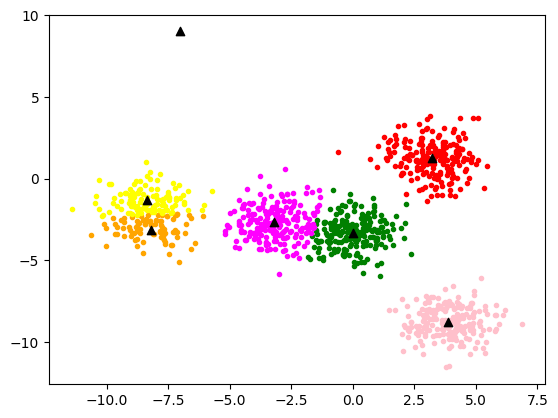

In [56]:
assign_points(clusters)
plt_steps(clusters)
update_centroid(clusters)

In [ ]:
#Implementing the elbow concept to find the optimal value of k.
elbow = []
for i in range(1,11):
    